<a href="https://colab.research.google.com/github/Bisan-Abuzubaida/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Auhor: Bisan Abuzubaida

## Project Overview


## Import necessary Libaraies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Inspect Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
fpath = '/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df_sales = pd.read_csv(fpath)
#preview the first 5 raws of the sales dataset
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#print a summary of the sales dataset
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data


### check for duplicates

In [6]:
df_sales.duplicated().sum()

np.int64(0)

### check for unique Values

In [7]:
df_sales.nunique()

,0
Item_Identifier,1559
Item_Weight,415
Item_Fat_Content,5
Item_Visibility,7880
Item_Type,16
Item_MRP,5938
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,3
Outlet_Location_Type,3


In [8]:
(df_sales.nunique() / len(df_sales) * 100).sort_values(ascending= False)

,0
Item_Visibility,92.455708
Item_MRP,69.670304
Item_Outlet_Sales,40.983222
Item_Identifier,18.291681
Item_Weight,4.869178
Item_Type,0.187727
Outlet_Identifier,0.117330
Outlet_Establishment_Year,0.105597
Item_Fat_Content,0.058665
Outlet_Type,0.046932


**set an index for the dataset**

In [9]:
df_sales[['Item_Identifier', 'Outlet_Identifier']].sort_values('Item_Identifier')

,Item_Identifier,Outlet_Identifier
8043,DRA12,OUT010
118,DRA12,OUT017
1693,DRA12,OUT035
1197,DRA12,OUT045
1245,DRA12,OUT013
...,...,...
7926,NCZ54,OUT049
214,NCZ54,OUT010
1896,NCZ54,OUT027
7166,NCZ54,OUT019


In [10]:
is_unique = df_sales[['Outlet_Identifier', 'Item_Identifier']].duplicated().sum() == 0
print("Is the combination unique?", is_unique)

Is the combination unique? True


In [11]:
#another way to check
df_sales.duplicated(subset=['Outlet_Identifier', 'Item_Identifier']).sum()

np.int64(0)

In [12]:
df_sales = df_sales.set_index(['Item_Identifier', 'Outlet_Identifier'])

In [13]:
df_sales

,,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,Outlet_Identifier,,,,,,,,,,
FDA15,OUT049,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,OUT018,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,OUT049,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,OUT010,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,OUT013,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
FDF22,OUT013,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
FDS36,OUT045,8.380,Regular,0.046982,Baking Goods,108.1570,2002,NaN,Tier 2,Supermarket Type1,549.2850
NCJ29,OUT035,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136


In [14]:
df_sales.loc['FDA15']

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Outlet_Identifier,,,,,,,,,,
OUT049,9.3,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
OUT045,9.3,Low Fat,0.016055,Dairy,250.2092,2002,NaN,Tier 2,Supermarket Type1,5976.2208
OUT035,9.3,Low Fat,0.016019,Dairy,248.5092,2004,Small,Tier 2,Supermarket Type1,6474.2392
OUT018,9.3,Low Fat,0.016088,Dairy,249.6092,2009,Medium,Tier 3,Supermarket Type2,5976.2208
OUT010,9.3,Low Fat,0.026818,Dairy,248.9092,1998,NaN,Tier 3,Grocery Store,498.0184
OUT013,9.3,Low Fat,0.016009,Dairy,250.6092,1987,High,Tier 3,Supermarket Type1,6474.2392
OUT027,NaN,Low Fat,0.015945,Dairy,249.5092,1985,Medium,Tier 3,Supermarket Type3,6474.2392
OUT017,9.3,LF,0.016113,Dairy,248.8092,2007,NaN,Tier 2,Supermarket Type1,5976.2208


### Handling null values

In [15]:
null_count = df_sales.isna().sum()
null_count

,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0
Outlet_Type,0
Item_Outlet_Sales,0


In [16]:
null_percent = null_count / len(df_sales) * 100
null_percent

,0
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000
Outlet_Type,0.000000
Item_Outlet_Sales,0.000000


In [17]:
cat_cols = df_sales.select_dtypes('object').columns
num_cols = df_sales.select_dtypes('number').columns
print(f'categorical columns \n {cat_cols}')
print(f'number columns \n {num_cols}')


categorical columns 
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')
number columns 
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')


**There are two columns with Null Values
one categorical column Outlet_Size and one numerical column Item_Weight**

In [18]:
# check values in Outlet_Size column
df_sales['Outlet_Size'].value_counts(dropna= False)

,count
Outlet_Size,
Medium,2793
NaN,2410
Small,2388
High,932


In [19]:
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna('MISSING')
df_sales['Outlet_Size'].value_counts(dropna= False)

,count
Outlet_Size,
Medium,2793
MISSING,2410
Small,2388
High,932


In [20]:
##check values in Item_Weight
df_sales['Item_Weight'].value_counts(dropna= False)

,count
Item_Weight,
NaN,1463
12.150,86
17.600,82
13.650,77
11.800,76
...,...
5.210,2
9.420,1
7.685,1


To know how to  fill the NaN in the Item Weight I want to first check if the items with the same Item_Identifier have the same Item_weight

In [21]:
df_sales.index.get_level_values('Item_Identifier').value_counts()

,count
Item_Identifier,
FDW13,10
FDG33,10
FDX31,9
FDT07,9
NCY18,9
...,...
FDO33,1
FDK57,1
FDT35,1


In [22]:
# Group by Item_Identifier and check unique weights
weight_check = df_sales.groupby('Item_Identifier')['Item_Weight'].nunique()
weight_check

,Item_Weight
Item_Identifier,
DRA12,1
DRA24,1
DRA59,1
DRB01,1
DRB13,1
...,...
NCZ30,1
NCZ41,1
NCZ42,1


In [23]:
# Items with more than one unique weight
inconsistent_items = weight_check[weight_check > 1]
print(f"Inconsistent weights found for {len(inconsistent_items)} items.")

Inconsistent weights found for 0 items.


In [24]:
# Group by Item_Identifier and check unique weights
weight_check_nan = df_sales.groupby('Item_Identifier')['Item_Weight'].nunique(dropna= False)
weight_check_nan

,Item_Weight
Item_Identifier,
DRA12,1
DRA24,2
DRA59,2
DRB01,2
DRB13,1
...,...
NCZ30,2
NCZ41,1
NCZ42,1


In [25]:
weight_check_nan[(weight_check_nan > 2) & (weight_check_nan < 1)]

,Item_Weight
Item_Identifier,


In [26]:
df_sales.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [27]:
# Create weight map
weight_map = df_sales.groupby(level='Item_Identifier')['Item_Weight'].mean()

# Map weights to each row using index level
mapped_weights = pd.Series(
    df_sales.index.get_level_values('Item_Identifier').map(weight_map),
    index=df_sales.index
)

# Fill missing values
df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(mapped_weights)

In [28]:
# check if 'Item_Weight' is no longer has NaN
df_sales['Item_Weight'].isna().sum()

np.int64(4)

In [29]:
missing_weights = df_sales[df_sales['Item_Weight'].isna()]
missing_ids = missing_weights.index.get_level_values('Item_Identifier').unique()
print("Missing Item_Identifiers:", missing_ids)

Missing Item_Identifiers: Index(['FDN52', 'FDK57', 'FDE52', 'FDQ60'], dtype='object', name='Item_Identifier')


In [30]:
df_sales.loc[missing_ids]

,,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,Outlet_Identifier,,,,,,,,,,
FDN52,OUT027,NaN,Regular,0.130933,Frozen Foods,86.9198,1985,Medium,Tier 3,Supermarket Type3,1569.9564
FDK57,OUT027,NaN,Low Fat,0.079904,Snack Foods,120.0440,1985,Medium,Tier 3,Supermarket Type3,4434.2280
FDE52,OUT027,NaN,Regular,0.029742,Dairy,88.9514,1985,Medium,Tier 3,Supermarket Type3,3453.5046
FDQ60,OUT019,NaN,Regular,0.191501,Baking Goods,121.2098,1985,Small,Tier 1,Grocery Store,120.5098


In [31]:
## the same item is filled with the same weight
df_sales.loc['FDA15']

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Outlet_Identifier,,,,,,,,,,
OUT049,9.3,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
OUT045,9.3,Low Fat,0.016055,Dairy,250.2092,2002,MISSING,Tier 2,Supermarket Type1,5976.2208
OUT035,9.3,Low Fat,0.016019,Dairy,248.5092,2004,Small,Tier 2,Supermarket Type1,6474.2392
OUT018,9.3,Low Fat,0.016088,Dairy,249.6092,2009,Medium,Tier 3,Supermarket Type2,5976.2208
OUT010,9.3,Low Fat,0.026818,Dairy,248.9092,1998,MISSING,Tier 3,Grocery Store,498.0184
OUT013,9.3,Low Fat,0.016009,Dairy,250.6092,1987,High,Tier 3,Supermarket Type1,6474.2392
OUT027,9.3,Low Fat,0.015945,Dairy,249.5092,1985,Medium,Tier 3,Supermarket Type3,6474.2392
OUT017,9.3,LF,0.016113,Dairy,248.8092,2007,MISSING,Tier 2,Supermarket Type1,5976.2208


In [32]:
#Fill Remaining NaNs with Global Mean
global_mean = df_sales['Item_Weight'].mean()
df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(global_mean)

In [33]:
df_sales['Item_Weight'].isna().sum()

np.int64(0)

***Now all the missing values has been handled***

### checking for inconsistency

In [34]:
cat_cols = df_sales.select_dtypes('object').columns
for col in cat_cols:
  print(df_sales[col].value_counts(),'\n')

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64 

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64 

Outlet_Size
Medium     2793
MISSING    2410
Small      2388
High        932
Name: count, dtype: int64 

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64 

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64 



In [35]:
# handle incosistency in Item_Fat_Content column
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg':'Regular','low fat': 'Low Fat' })
df_sales['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [36]:
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875420,0.066132,140.992782,1997.831867,2181.288914
std,4.645008,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [37]:
fpath_out = '/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023_cleaned.csv'
df_sales.to_csv(fpath_out,index= True ,index_label=['Item_Identifier', 'Outlet_Identifier'])

In [38]:
loaded = pd.read_csv(fpath_out, index_col=['Item_Identifier', 'Outlet_Identifier'])
loaded.index

MultiIndex([('FDA15', 'OUT049'),
            ('DRC01', 'OUT018'),
            ('FDN15', 'OUT049'),
            ('FDX07', 'OUT010'),
            ('NCD19', 'OUT013'),
            ('FDP36', 'OUT018'),
            ('FDO10', 'OUT013'),
            ('FDP10', 'OUT027'),
            ('FDH17', 'OUT045'),
            ('FDU28', 'OUT017'),
            ...
            ('FDH31', 'OUT035'),
            ('FDA01', 'OUT045'),
            ('FDH24', 'OUT018'),
            ('NCJ19', 'OUT018'),
            ('FDF53', 'OUT046'),
            ('FDF22', 'OUT013'),
            ('FDS36', 'OUT045'),
            ('NCJ29', 'OUT035'),
            ('FDN46', 'OUT018'),
            ('DRG01', 'OUT046')],
           names=['Item_Identifier', 'Outlet_Identifier'], length=8523)

In [39]:
loaded.head()

,,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,Outlet_Identifier,,,,,,,,,,
FDA15,OUT049,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,OUT018,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,OUT049,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,OUT010,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,MISSING,Tier 3,Grocery Store,732.3800
NCD19,OUT013,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


## Exploratory Data Analysis

In [40]:
fpath_out = '/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023_cleaned.csv'

df = pd.read_csv(fpath_out, index_col=['Item_Identifier', 'Outlet_Identifier'])

In [41]:
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

### Histograms to view the distributions of numerical features in your dataset.

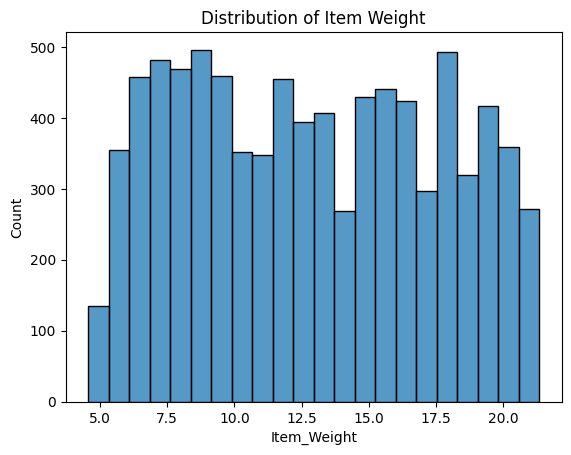

In [42]:
ax  = sns.histplot(data= df, x='Item_Weight')
ax.set_title('Distribution of Item Weight');

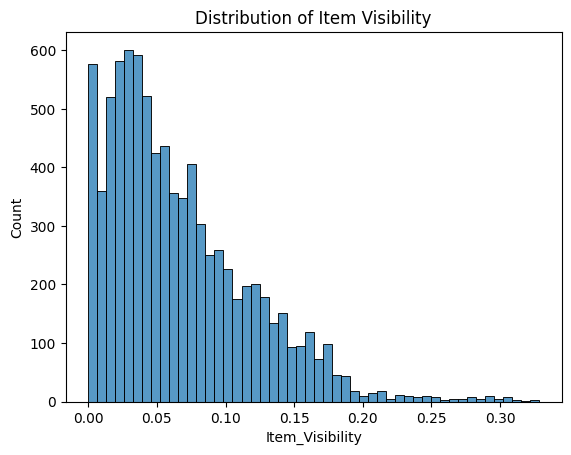

In [43]:
ax = sns.histplot(data= df, x='Item_Visibility')
ax.set_title('Distribution of Item Visibility');


```
- Most products take up very little space on store shelves — less than 5% of the total display area.
- A lot of products have almost zero visibility, which might mean:
- They’re not currently displayed
- They’re just listed in the system but not shown
- Or there could be some missing or incorrect data
- Only a few products take up a large amount of shelf space, which means most of the attention goes to a small group of items.

```

In [44]:
df['Item_Visibility'].value_counts()

,count
Item_Visibility,
0.000000,526
0.076975,3
0.061271,2
0.046825,2
0.112399,2
...,...
0.054142,1
0.018920,1
0.044974,1


In [45]:
df.loc[df['Item_Visibility'] == 0, 'Item_Outlet_Sales']

,,Item_Outlet_Sales
Item_Identifier,Outlet_Identifier,
FDX07,OUT010,732.3800
NCD19,OUT013,994.7052
FDP36,OUT018,556.6088
FDY07,OUT049,1516.0266
FDP33,OUT018,3068.0064
...,...,...
FDQ58,OUT019,459.4020
DRJ49,OUT013,2324.9736
FDR20,OUT010,45.2744


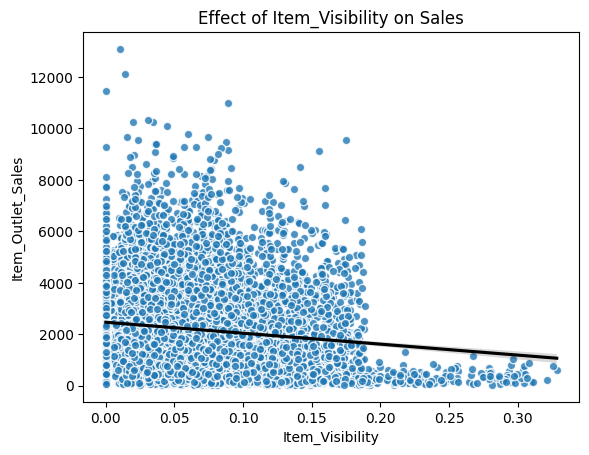

In [88]:
line_kws = dict(color = 'black')
scatter_kws = dict(edgecolor = 'white')
ax = sns.regplot(data= df, x='Item_Visibility', y='Item_Outlet_Sales', line_kws= line_kws, scatter_kws= scatter_kws)
ax.set_title('Effect of Item_Visibility on Sales');

```
Zero Visibility but Still Selling
- Products with 0% visibility are still being sold — some with very high sales.
- This means that visibility = 0 probably doesn’t mean the product wasn’t displayed. It could be:
- A missing value or placeholder
- A data entry issue
- Or maybe visibility wasn’t recorded properly for those items
```


```
- The weak negative trend suggests that more visibility doesn’t always mean more sales — maybe because popular products sell well even with small shelf space.
-  Visibility might interact with other features like Item_Type or Outlet_Type.

```


In [47]:
df['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [48]:
df['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


/tmp/ipython-input-1635156725.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize= 30)
/tmp/ipython-input-1635156725.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([label.get_text() for label in ax.get_yticklabels()], fontsize=30)


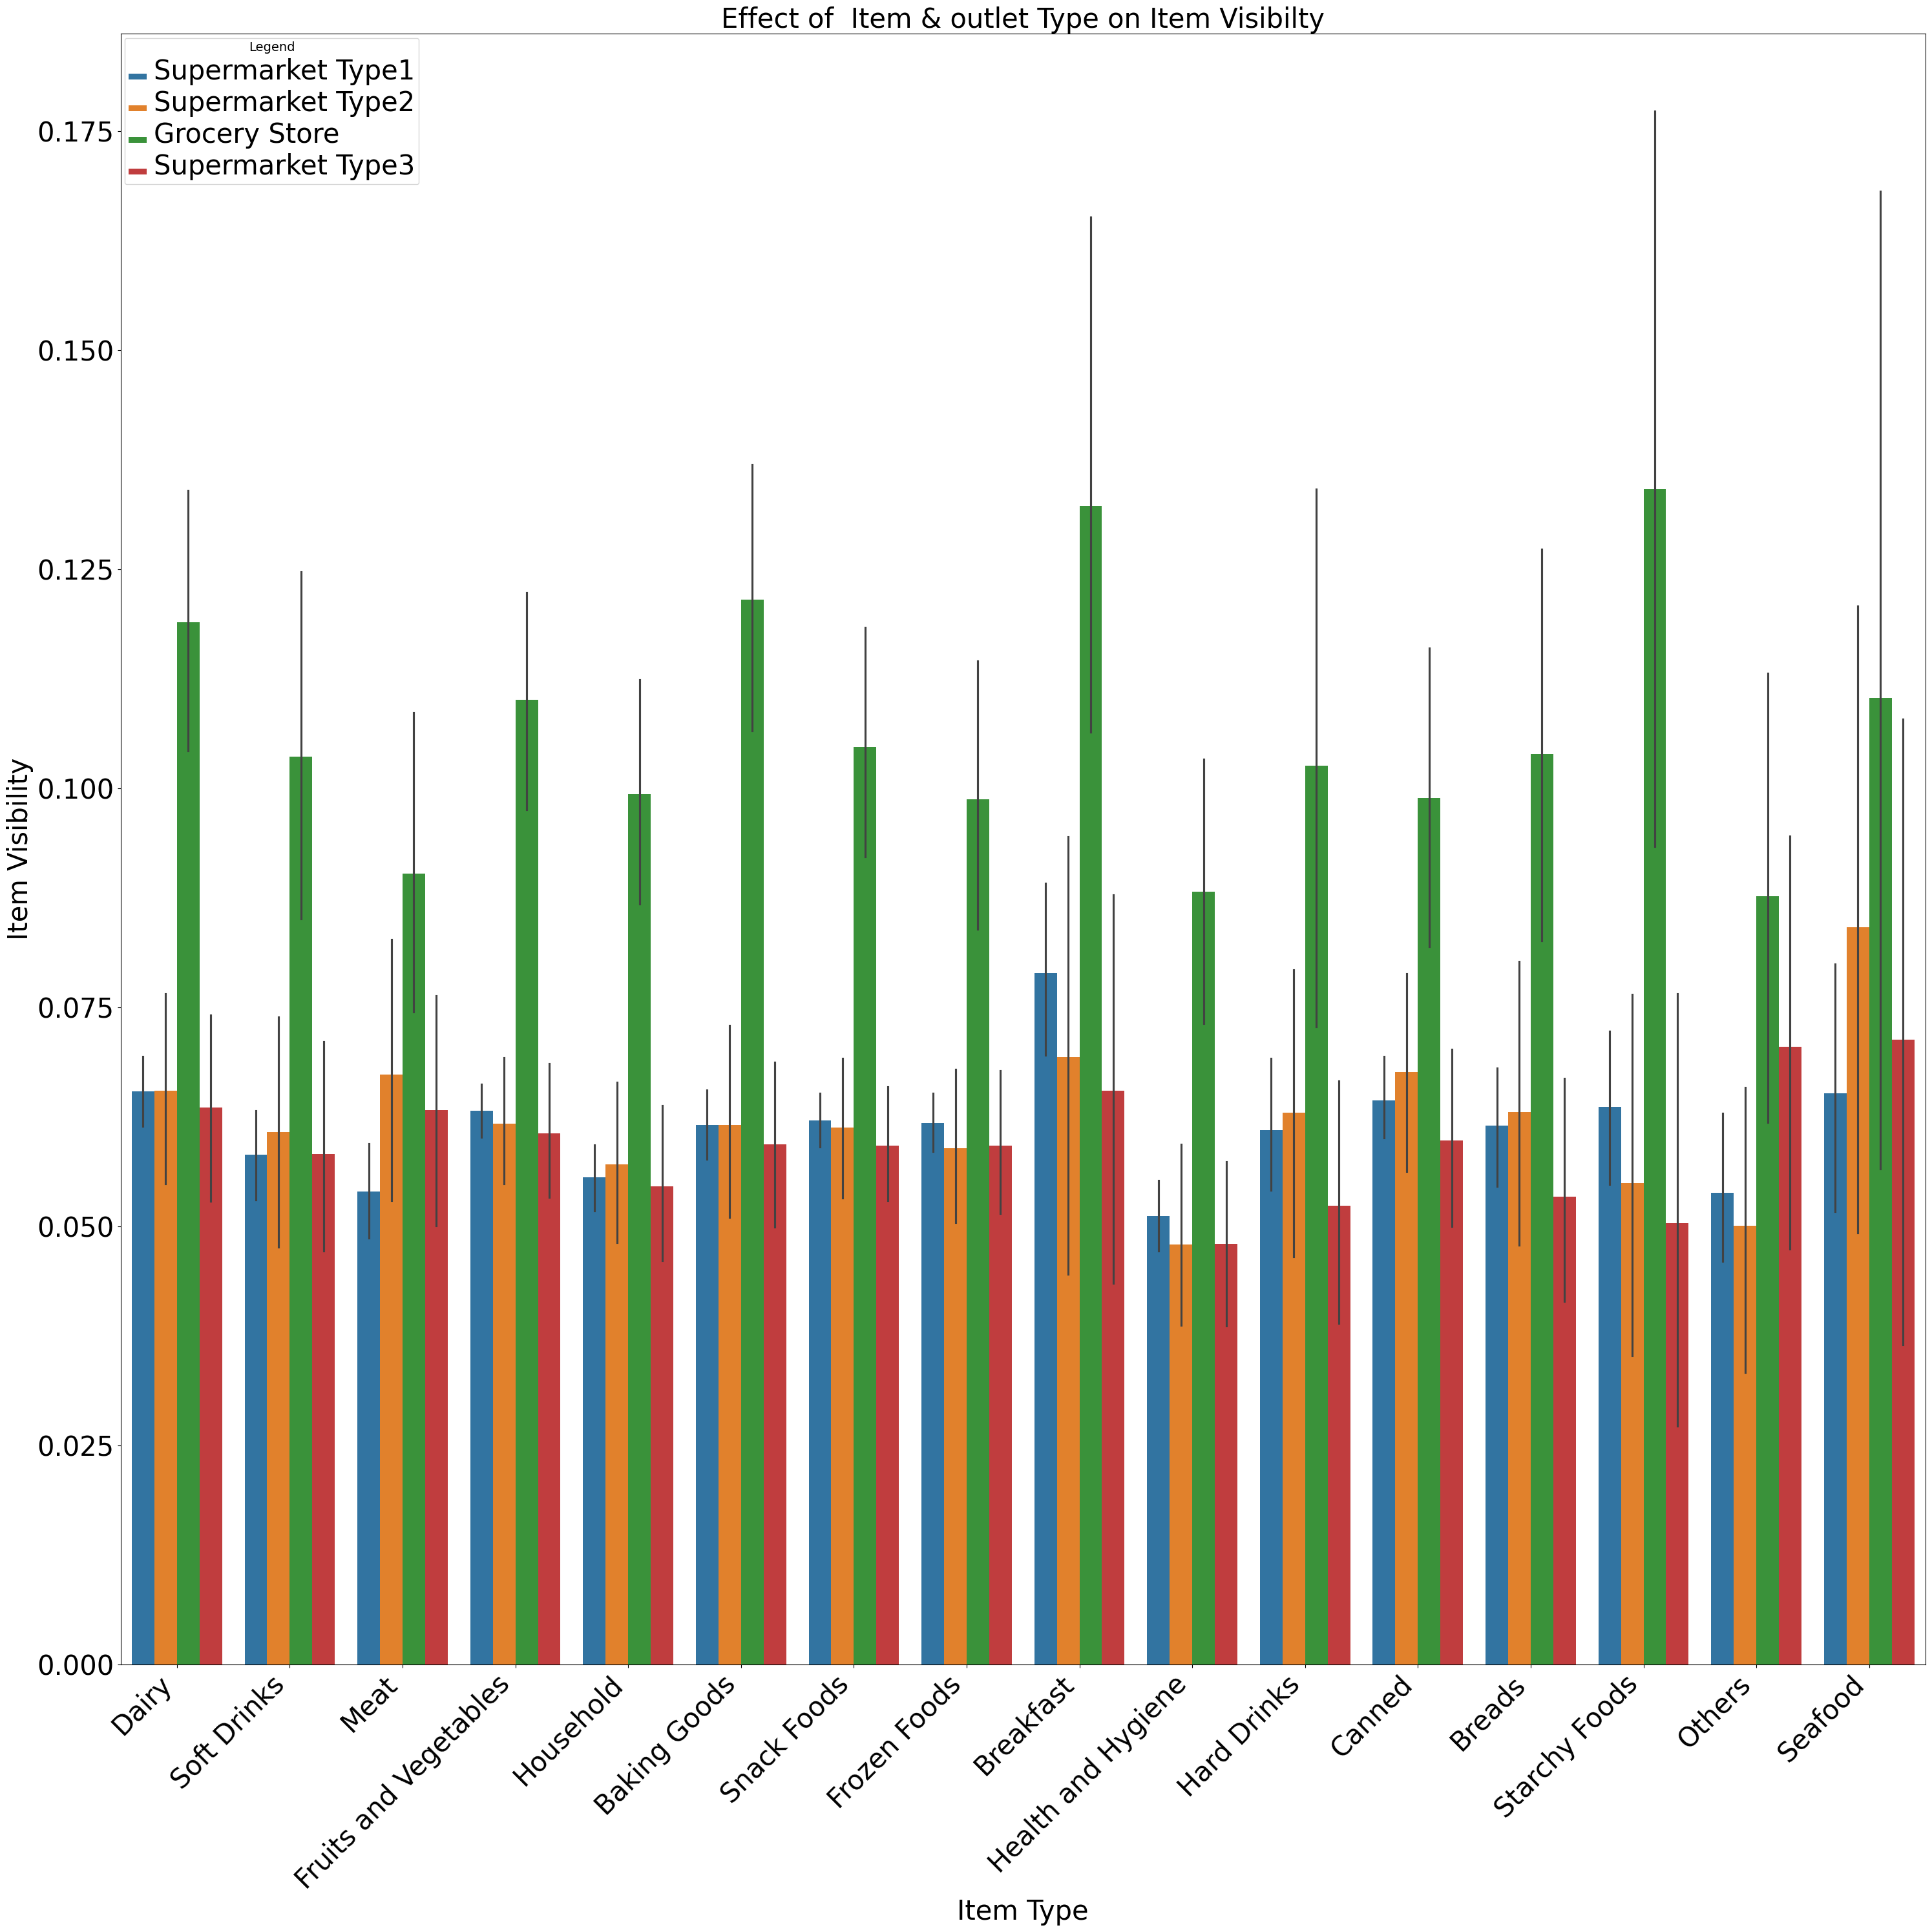

In [89]:
fig, ax= plt.subplots(figsize=(30,30))
sns.barplot(data= df, x= 'Item_Type', y= 'Item_Visibility', hue= 'Outlet_Type', ax= ax)

ax.set_title('Effect of  Item & outlet Type on Item Visibilty', fontsize= 30);
ax.set_xlabel('Item Type', fontsize= 30)
ax.set_ylabel('Item Visibility', fontsize= 30)

# Rotate x-axis labels for better readability (optional)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize= 30)
ax.set_yticklabels([label.get_text() for label in ax.get_yticklabels()], fontsize=30)

legend = ax.get_legend()
if legend:
    legend.set_title('Legend', prop={'size': 14})
    for text in legend.get_texts():
        text.set_fontsize(30)

# Adjust layout
fig.tight_layout();


```
- Grocery Stores may prioritize product visibility more aggressively — possibly due to smaller layouts or focused product placement.
- Supermarkets, especially Type1 and Type2, might have broader assortments or larger spaces, which can dilute individual item visibility.
- The variation across item types is less pronounced than the variation across outlet types — outlet type seems to be the stronger factor.
```

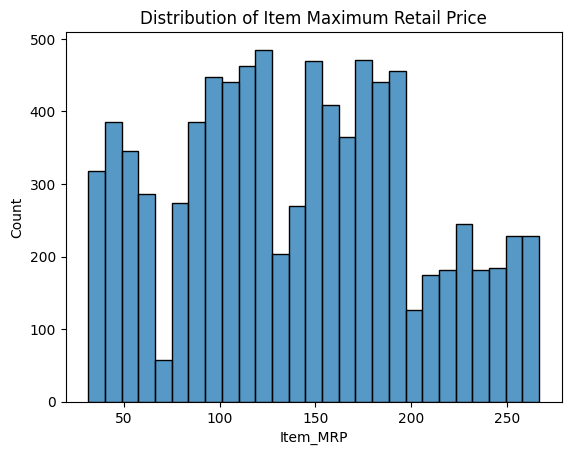

In [50]:
ax = sns.histplot(data= df, x='Item_MRP')
ax.set_title('Distribution of Item Maximum Retail Price');


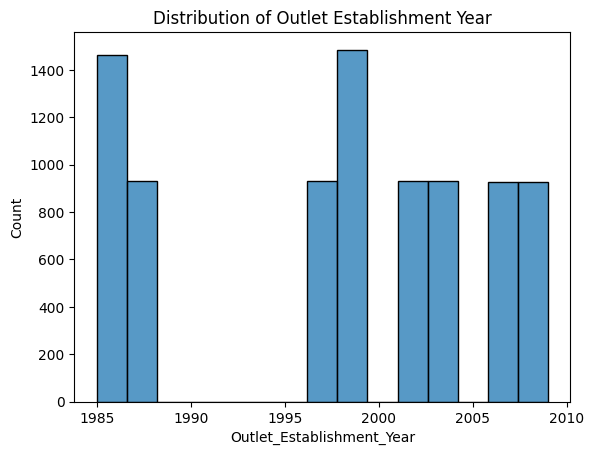

In [51]:
ax = sns.histplot(data= df, x='Outlet_Establishment_Year')
ax.set_title('Distribution of Outlet Establishment Year');


```
📈 Histogram Insight
- The histogram reveals high frequencies in 1985 and 1987, followed by a complete gap from 1988 to 1996.
- From 1997 to 2009, outlet counts are consistently around ~930 per year.
- This gap creates a non-uniform distribution, which visually resembles skewness in the boxplot.
```

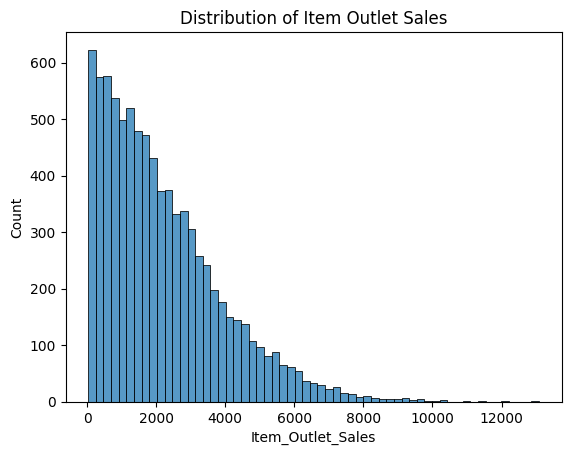

In [53]:
ax = sns.histplot(data= df, x='Item_Outlet_Sales')
ax.set_title('Distribution of Item Outlet Sales');


```
📈 Distribution of Item Outlet Sales

- The sales distribution is right-skewed, with most values concentrated between 0 and 2,000.
- A sharp peak occurs in the lowest sales bin, indicating a large number of low-performing items or outlets.
- Very few observations exceed 10,000 in sales, suggesting that high-volume sales are rare and possibly driven by outliers or exceptional cases.

```

### Boxplots to view statistical summaries of numerical features in your dataset.


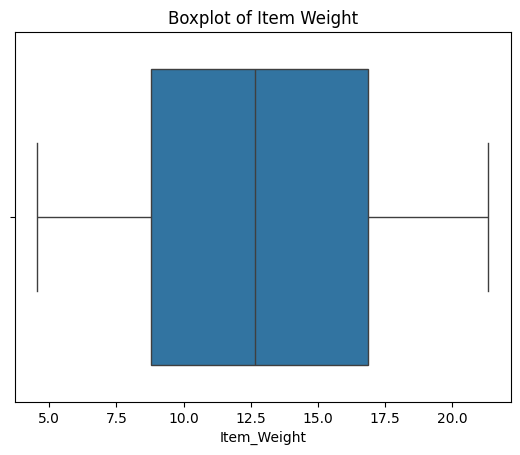

In [54]:
ax = sns.boxplot(data= df, x='Item_Weight')
ax.set_title('Boxplot of Item Weight');

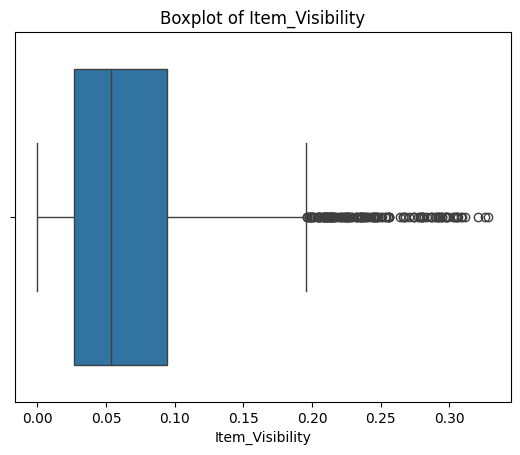

In [55]:
ax = sns.boxplot(data= df, x='Item_Visibility')
ax.set_title('Boxplot of Item_Visibility');

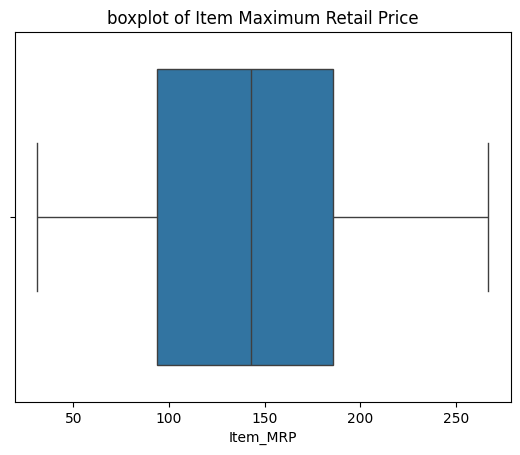

In [56]:
ax= sns.boxplot(data= df, x='Item_MRP')
ax.set_title('boxplot of Item Maximum Retail Price');

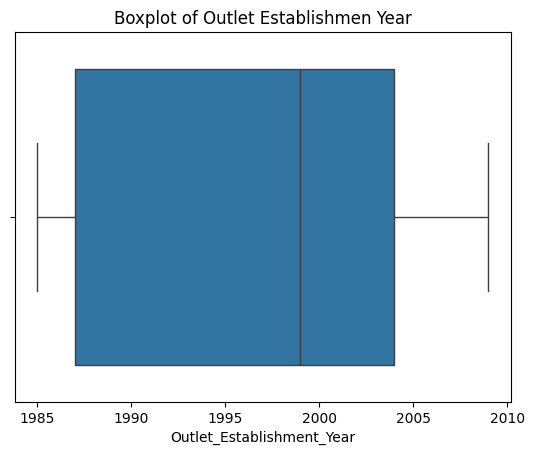

In [57]:
ax= sns.boxplot(data= df, x='Outlet_Establishment_Year')
ax.set_title('Boxplot of Outlet Establishmen Year');

In [83]:
df['Outlet_Establishment_Year'].value_counts().sort_index()

,count
Outlet_Establishment_Year,
1985,1463
1987,932
1997,930
1998,555
1999,930
2002,929
2004,930
2007,926
2009,928



### 📊 Understanding Skewness in Outlet Establishment Years

#### 🔍 Boxplot Interpretation
- The boxplot of `Outlet_Establishment_Year` shows **left skewness**:
  - The **left whisker is longer**, indicating a wider spread of older establishment years.
  - The **median is closer to the upper quartile**, suggesting that more data points are clustered in the recent years.

#### ⚠️ Important Clarification
- The **boxplot suggests skewness**, but the histogram shows that it's not due to a gradual tail of low-frequency years.
- Instead, the **left skew is caused by a discontinuity** — a **missing block of years** (1988–1996) with **zero outlets**.
- So, the skewness is **structural**, not statistical. It’s not a long tail of sparse data, but a **gap in time**.

#### 💡 Key Takeaways
- **Early years (1985, 1987)** have **high outlet counts**, not low — contradicting the assumption that skewness means fewer early outlets.
- The **gap between 1987 and 1997** stretches the distribution left, creating the skewed appearance.


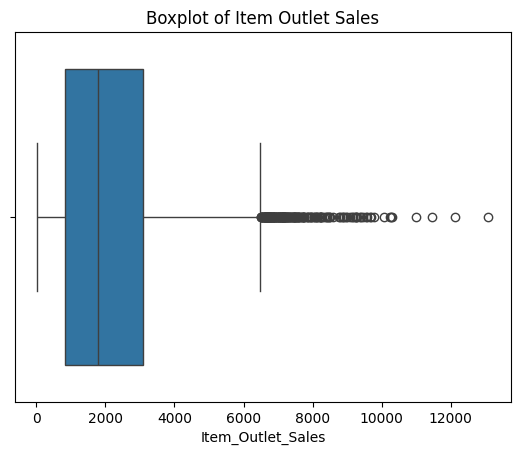

In [58]:
ax= sns.boxplot(data= df, x='Item_Outlet_Sales')
ax.set_title('Boxplot of Item Outlet Sales');

### Insights from Boxplot of Item_Outlet_Sales
```
- The median sales value is around 2,000–2,500, meaning half of the outlets/items have sales below this range and half above.  

- The interquartile range (IQR) lies roughly between 1,000 and 3,000, indicating that most sales are concentrated within this range.  

- There are several outliers on the higher side (above ~6,000). Some outlets/items even exceed 10,000–12,000, which are much higher than the typical values.  

- The distribution is right-skewed (positively skewed). Most values are clustered between 0–4,000, with fewer very high values stretching the tail.  

- These outliers may represent high-performing outlets or popular items rather than errors, so they should be carefully considered before removal.  

```

### Scatter and Regression Plot of Item_MRP vs Item_Outlet_Sales

Since `Item_MRP` has the strongest correlation with `Item_Outlet_Sales`, plotting a scatter plot with a regression line will help visualize the relationship clearly. This step also allows us to detect potential outliers that deviate from the general sales trend.  
It is plotted below.


### Heatmap to view the correlation between features.

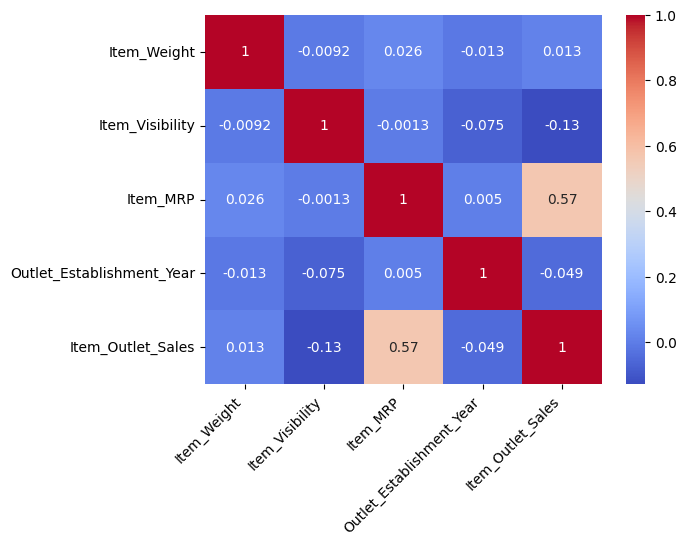

In [59]:
corr = df_sales.corr(numeric_only= True)
ax = sns.heatmap(corr, cmap= 'coolwarm',annot= True)
ax.set_xticklabels(ax.get_xticklabels(),rotation= 45, ha='right');

#### Correlation Insights from Heatmap
```
- Item_Weight
  - Very weak correlations with all other variables (close to 0).  
  - It does not strongly affect Item_Outlet_Sales.  

- Item_Visibility
  - Weak negative correlation with Item_Outlet_Sales (-0.13).  
  - This means there are some items with higher visibility tend to sell slightly less, possibly because they are placed in less favorable positions or are less attractive.  

- Item_MRP (Maximum Retail Price)
  - Strongest positive correlation with Item_Outlet_Sales comapring to other features (medium positive correlation) (0.57).  
  - This suggests that items with higher prices tend to sell more, likely because expensive items may represent premium or popular categories.  

- Outlet_Establishment_Year
  - Almost no correlation with Item_Outlet_Sales (-0.049).  
  - The year the outlet was established does not impact sales directly.  

```

### Countplots to view the frequency of each class of categorial features in your dataset.


In [60]:
df.select_dtypes('object').columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

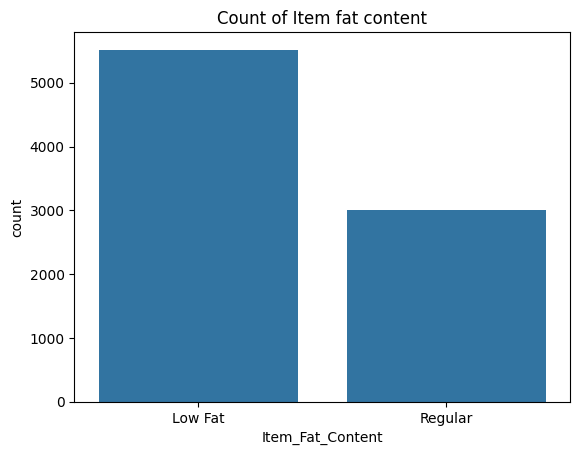

In [61]:
ax = sns.countplot(data= df, x= 'Item_Fat_Content')
ax.set_title('Count of Item fat content');

/tmp/ipython-input-2326302522.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation= 45, ha='right');


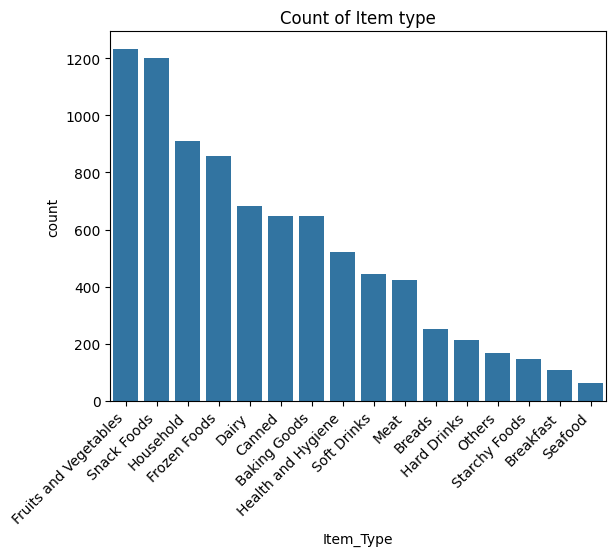

In [62]:
ax = sns.countplot(data= df, x= 'Item_Type', order= df.Item_Type.value_counts().index)
ax.set_title('Count of Item type')
ax.set_xticklabels(ax.get_xticklabels(), rotation= 45, ha='right');

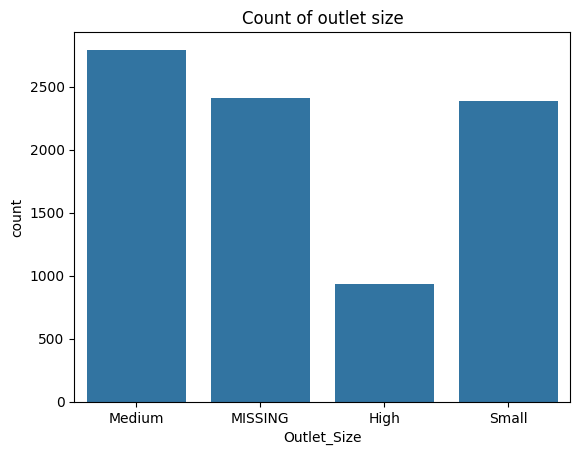

In [63]:
ax = sns.countplot(data= df, x= 'Outlet_Size')
ax.set_title('Count of outlet size');

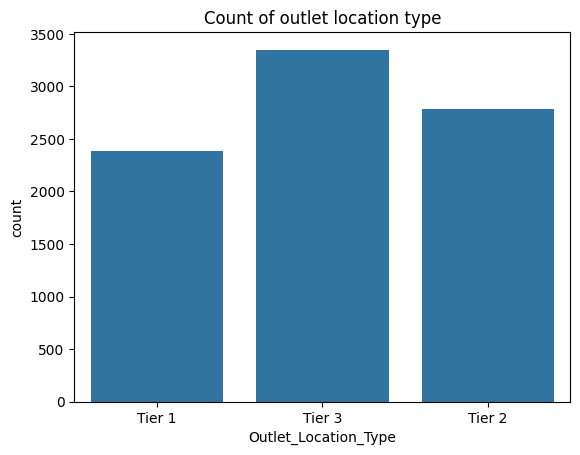

In [64]:
ax = sns.countplot(data= df, x= 'Outlet_Location_Type')
ax.set_title('Count of outlet location type');

/tmp/ipython-input-3511309572.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation= 45, ha='right');


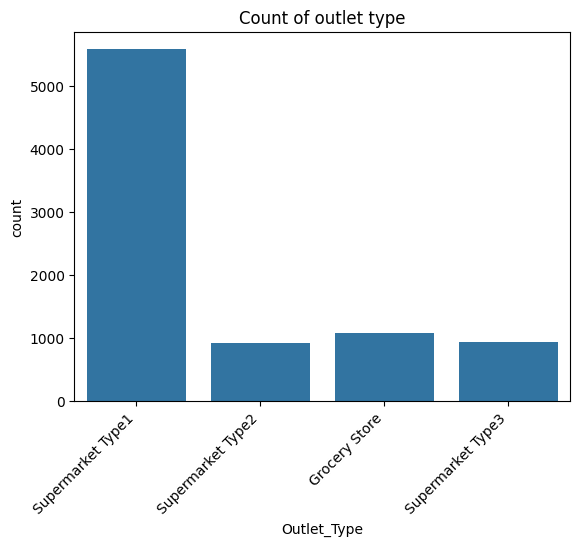

In [65]:
ax = sns.countplot(data= df, x= 'Outlet_Type')
ax.set_title('Count of outlet type')
ax.set_xticklabels(ax.get_xticklabels(), rotation= 45, ha='right');

### Multivariate plots

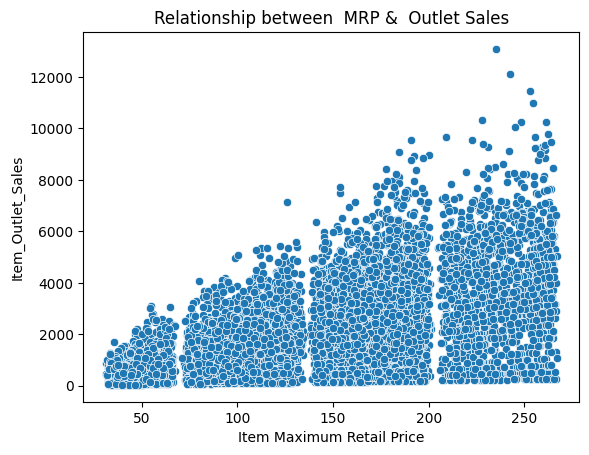

In [66]:
ax = sns.scatterplot(data= df, x='Item_MRP', y='Item_Outlet_Sales')
ax.set_xlabel('Item Maximum Retail Price')
ax.set_title('Relationship between  MRP &  Outlet Sales');

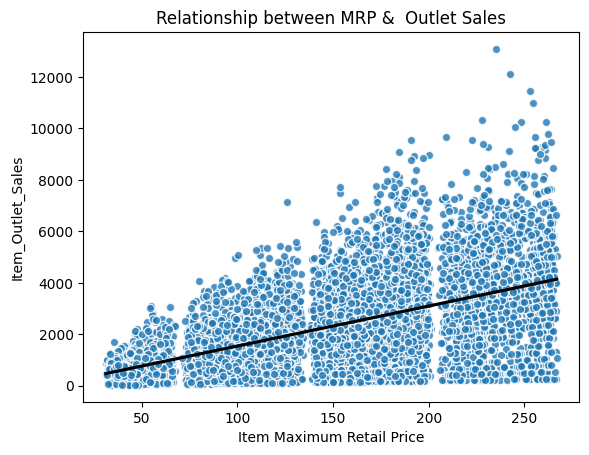

In [67]:
line_kws= dict(color='black')
scatter_kws= dict(edgecolor='white')
ax= sns.regplot(data= df, x='Item_MRP', y='Item_Outlet_Sales', line_kws= line_kws, scatter_kws= scatter_kws)
ax.set_xlabel('Item Maximum Retail Price')
ax.set_title('Relationship between MRP &  Outlet Sales');


```
📉 Regression: Item MRP vs. Item Outlet Sales

- Moderate positive trend: higher MRP tends to align with higher sales.
- Items under 50 mostly have low sales (<2,000).
- Sales density increases around 120–150, with many items reaching 4,000–6,000 units.
- Items priced above 200 show strongest sales, some exceeding 12,000 units.
- Wide spread at each price level — e.g., items at 150 range from <1,000 to >10,000 units.
- Sales vary a lot at each price level — for example, items at 150 range from <1,000 to >10,000 units.
- There are noticeable price groups around 120, 150, and 200+ where sales tend to be higher — these may reflect common pricing strategies or popular product categories.

📝 Insight: Price affects sales, but the wide spread shows that other factors also play a big role. Certain price points seem to attract more buyers.
```

```A pairplot is one of the most powerful visual tools in seaborn for exploring relationships between numerical features. It creates a grid of scatterplots for every pair of numerical columns, along with histograms (or KDEs) on the diagonal.```

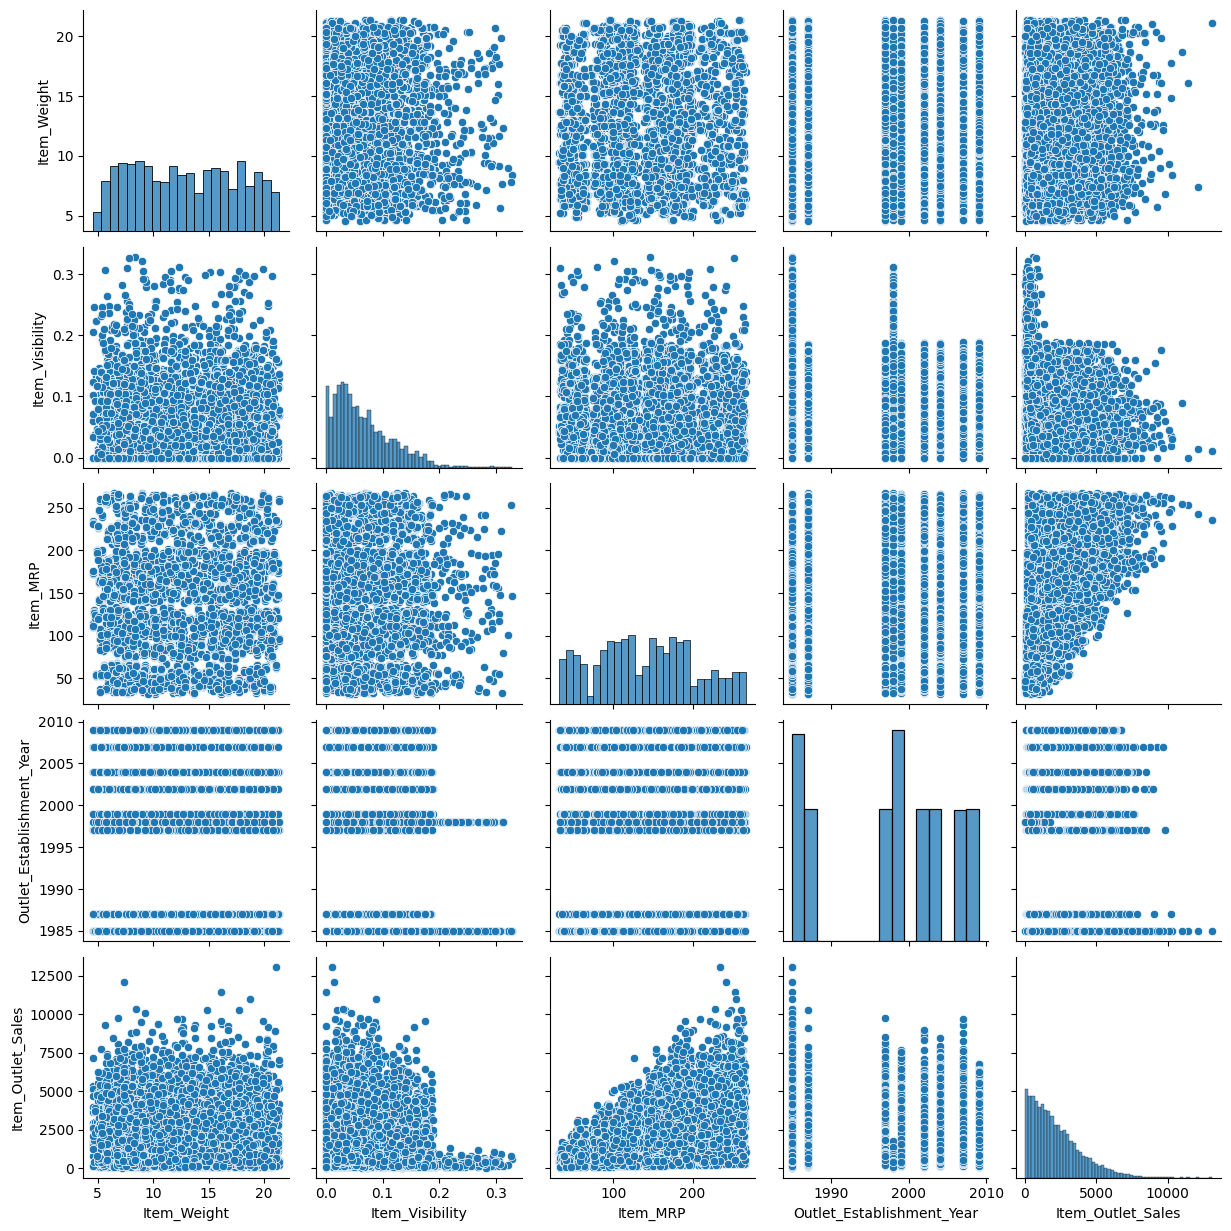

In [68]:
ax = sns.pairplot(df[num_cols])

#### Pair Plot
```
- Item MRP shows a clear upward trend with Item Outlet Sales, confirming a moderate positive relationship.
- Item Visibility and Item Weight show no strong patterns with sales — scatter plots appear diffuse.
- Outlet Establishment Year has minimal impact on sales in this view; no visible trend.
- Diagonal histograms reveal:
  - Item MRP is multimodal, with peaks around 50–250.
  - Item Outlet Sales is right-skewed, with most values under 2,000.

📝 Insight: Among all features, Item MRP stands out as the most informative for sales. Others show weak or no visible correlation.
```

### Barplots for each categorical feauture with the target column

In [69]:
df.select_dtypes('object').columns.to_list()

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

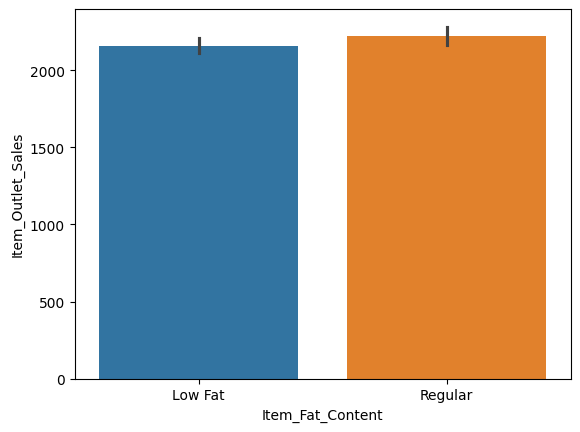

In [70]:
ax = sns.barplot(data= df, x= 'Item_Fat_Content', y='Item_Outlet_Sales', hue= 'Item_Fat_Content')

/tmp/ipython-input-2865324922.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation= 45, ha= 'right');


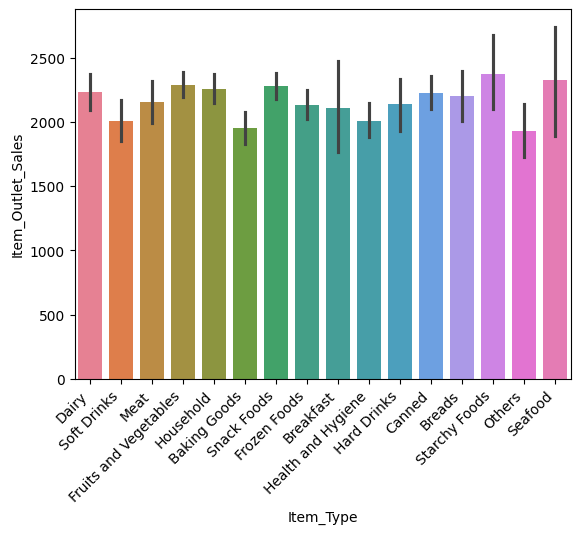

In [71]:
ax = sns.barplot(data= df, x= 'Item_Type', y='Item_Outlet_Sales', hue= 'Item_Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation= 45, ha= 'right');

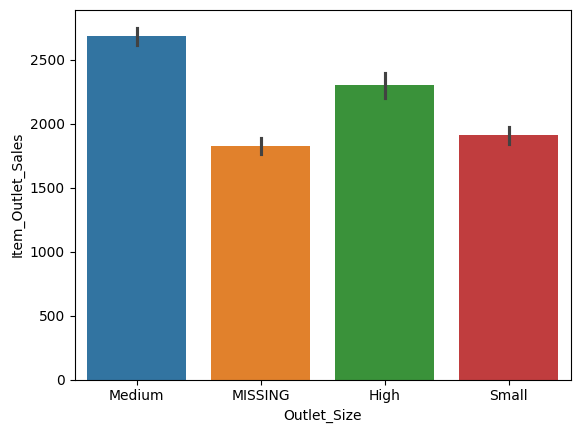

In [72]:
ax = sns.barplot(data= df, x= 'Outlet_Size', y='Item_Outlet_Sales', hue='Outlet_Size');

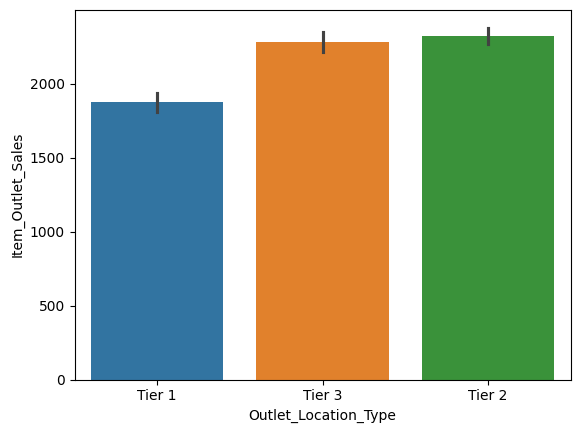

In [73]:
ax = sns.barplot(data= df, x= 'Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Location_Type');

/tmp/ipython-input-2386239054.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation= 30, ha= 'right');


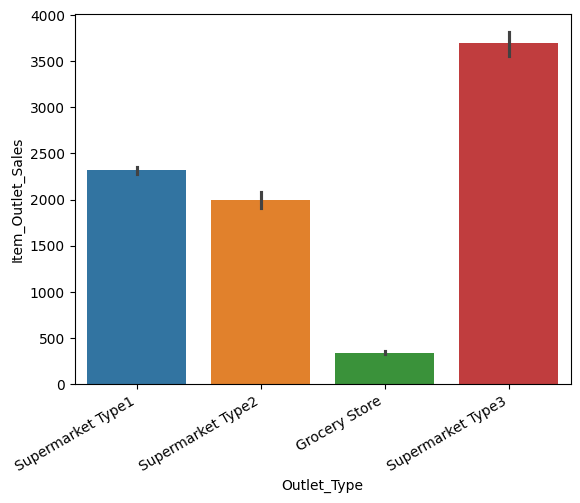

In [74]:
ax = sns.barplot(data= df, x= 'Outlet_Type', y='Item_Outlet_Sales', hue= 'Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation= 30, ha= 'right');

```
📊 Average Item Outlet Sales by Outlet Type

- Supermarket Type3 shows the highest average item outlet sales, approaching 4000 units—indicating strong performance and consumer preference.
- Supermarket Type1 and Type2 have comparable sales (~2000), with Type1 slightly ahead.
- Grocery Stores lag significantly behind, with average sales below 500, suggesting limited market reach or product variety.
- Error bars reveal some variability, but the dominance of Supermarket Type3 remains consistent across samples.

📝 _Insight_: Outlet type plays a critical role in sales performance. Supermarket Type3 may benefit from better location, size, or product assortment, making it a key target for future promotions or inventory expansion.
```

```
Time Analysis: Outlet_Establishment_Year
Goal: Explore how the age of the outlet affects sales.
```


In [84]:
df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().reset_index()


,Outlet_Establishment_Year,Item_Outlet_Sales
0,1985,2483.677474
1,1987,2298.995256
2,1997,2277.844267
3,1998,339.351662
4,1999,2348.354635
5,2002,2192.384798
6,2004,2438.841866
7,2007,2340.675263
8,2009,1995.498739


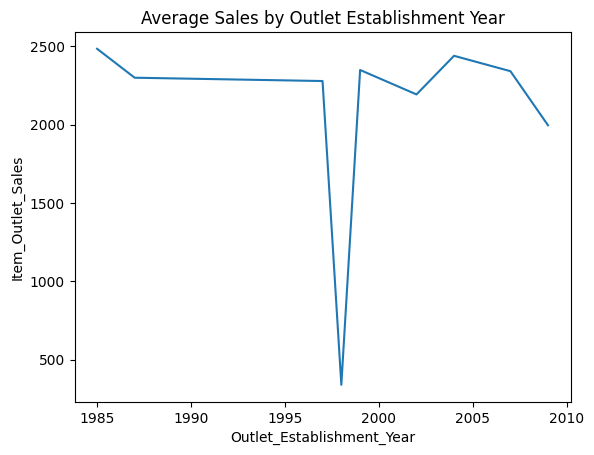

In [75]:
# Lineplot: Average sales by year
sales_by_year = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().reset_index()
ax = sns.lineplot(data=sales_by_year, x='Outlet_Establishment_Year', y='Item_Outlet_Sales')
ax.set_title('Average Sales by Outlet Establishment Year');


```
Average Sales by Outlet Establishment Year

Outlets established in 1985 have the highest average sales, around 2,484 units. Other strong performers include 2004 (2,439), 1999 (2,348), and 2007 (2,341). The lowest average sales appear in 1998, with just 339 units — a sharp drop compared to surrounding years.

There’s a noticeable gap between 1988 and 1996, so the trend isn’t continuous. Sales don’t consistently decline with newer outlets; for example, 1997 and 1999 still show solid performance. However, the most recent year, 2009, has the lowest among post-2000 outlets, at 1,995 units.

Insight: Sales vary across establishment years without a clear age-based pattern. The dip in 1998 stands out, and newer outlets like those from 2009 may face different market conditions.
```

/tmp/ipython-input-2756209732.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


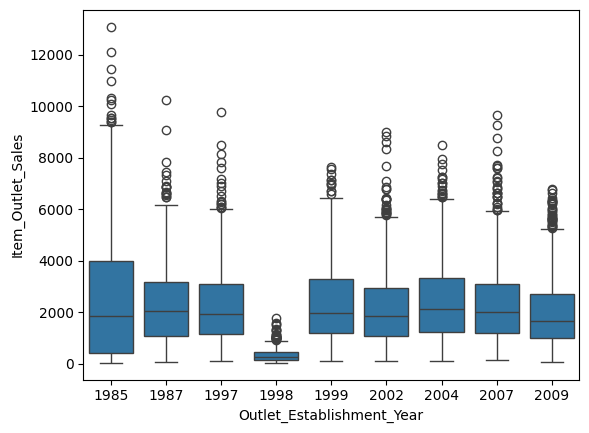

In [76]:
# Boxplot: Distribution of sales by year
sns.boxplot(data=df, x='Outlet_Establishment_Year', y='Item_Outlet_Sales')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Sales Distribution by Establishment Year');

```
 Insights from Boxplot

- Outlets from 1985 show the widest spread in sales, with many high-performing outliers.
- 1998 stands out with the lowest median and tight range, indicating consistently low sales.
- Other years like 1999, 2004, and 2007 have similar median sales but differ in variability.
- The presence of outliers in most years suggests that some outlets outperform their peers regardless of establishment year.

Insight: Sales performance varies by year, but not in a linear trend. Some older outlets perform strongly, while others like 1998 remain consistently low.
```

Grouped Boxplot


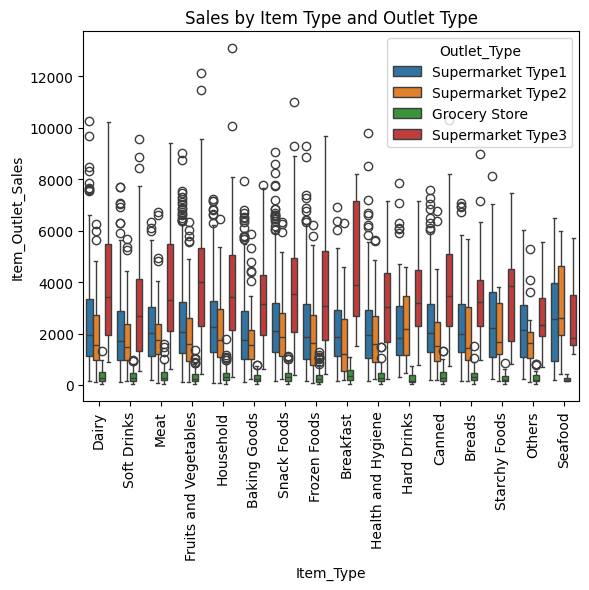

In [77]:
sns.boxplot(data=df, x='Item_Type', y='Item_Outlet_Sales', hue='Outlet_Type')
plt.xticks(rotation=90)
plt.title('Sales by Item Type and Outlet Type')
plt.show()

```
 Insights from Sales by Item Type and Outlet Type

- Supermarket Type3 consistently shows higher median sales across most item types, especially for Household, Dairy, and Snack Foods.
- Grocery Stores have low and narrow sales ranges for nearly all item types, indicating limited performance.
- Some item types like Breakfast and Seafood show low sales across all outlet types, suggesting niche or low-demand categories.
- Wide variability in sales for items like Snack Foods and Dairy suggests they perform differently depending on outlet type.

Insight: Sales are influenced not just by item type but also by outlet type, with Supermarket Type3 leading in performance and Grocery Stores trailing across the board.
```

Grouped Barplot (Mean Sales)


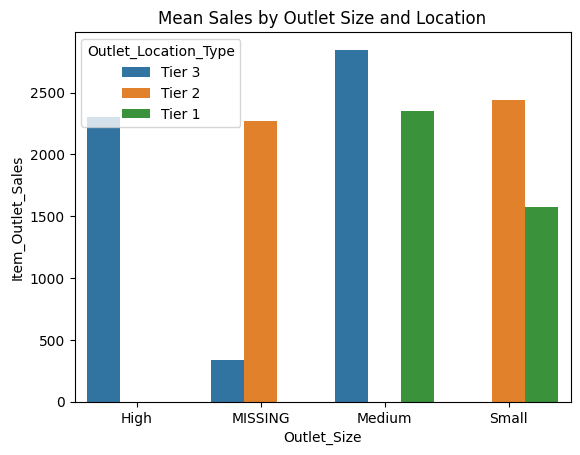

In [78]:
grouped = df.groupby(['Outlet_Size', 'Outlet_Location_Type'])['Item_Outlet_Sales'].mean().reset_index()
sns.barplot(data=grouped, x='Outlet_Size', y='Item_Outlet_Sales', hue='Outlet_Location_Type')
plt.title('Mean Sales by Outlet Size and Location')
plt.show()

#### FacetGrid: Compare Distributions Across Categories
Goal: See how a numerical feature behaves across different categories. italicized text***

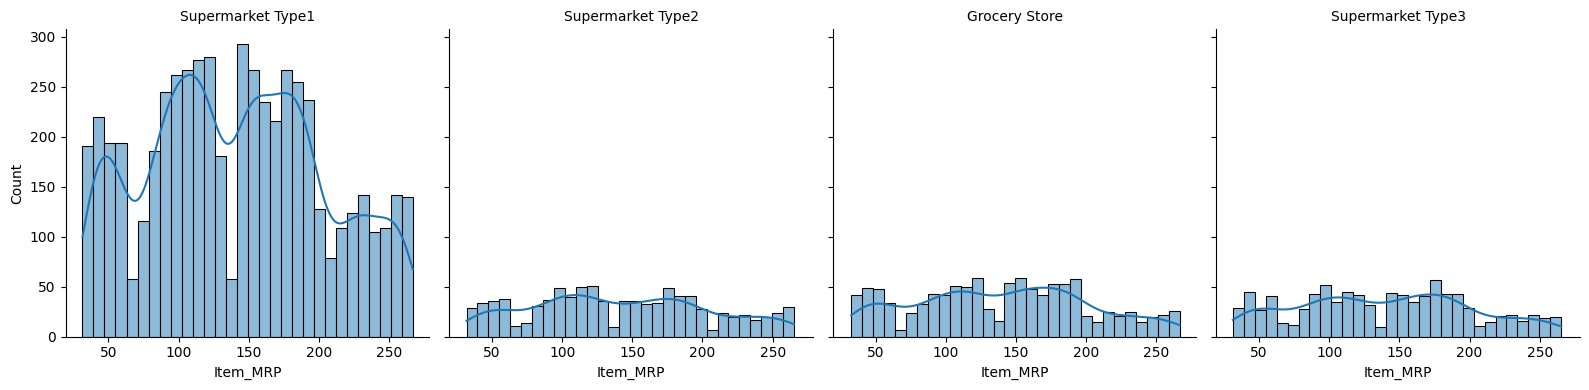

In [79]:
# Distribution of Item_MRP across Outlet_Type
g = sns.FacetGrid(df, col='Outlet_Type', height=4, aspect=1)
g.map(sns.histplot, 'Item_MRP', bins=30, kde=True)
g.set_titles('{col_name}')
plt.show()

#### Distribution of Item MRP Across Outlet Types
```
All outlet types carry items priced between 50 and 250, showing a consistent MRP range. The histogram reflects how many items fall into each price bin — not the actual price level or sales.

Supermarket Type1 shows the highest frequency across most bins, suggesting it includes more items in the dataset. Other outlet types have fewer entries, with their item counts concentrated in lower price ranges.

Insight: The MRP range is similar across outlet types, but Supermarket Type1 likely carries a broader inventory.Across all outlet types, most items are priced below 200, showing a clear concentration in lower price bands.
```

#### Feature-Target Relationship by Outlet Characteristics


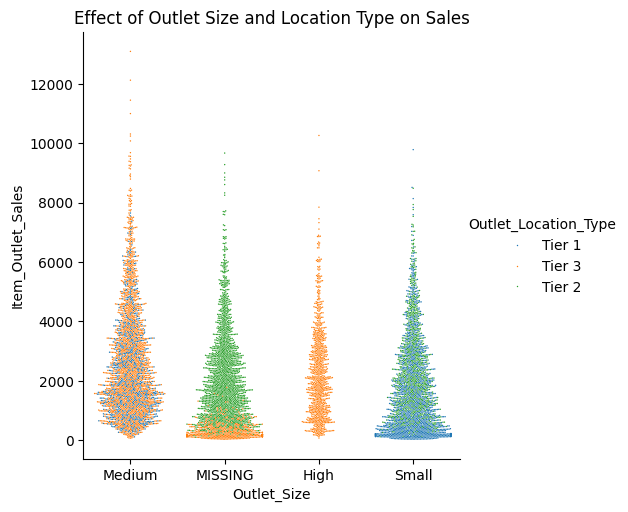

In [90]:
# Item_Outlet_Sales by Outlet_Size, Outlet_Location_Type
g= sns.catplot(kind= 'swarm', data= df, x='Outlet_Size' , y='Item_Outlet_Sales', hue= 'Outlet_Location_Type', s=1)
g.ax.set_title('Effect of Outlet Size and Location Type on Sales');

#### Sales Distribution by Outlet Size and Location Type
```
- Medium-sized outlets show the **widest spread** and **highest concentration** of sales across all location tiers, especially in Tier 1 and Tier 3.
- High-sized outlets appear only in Tier 3 and show **consistently strong sales**, though they are fewer in number.
- Small outlets have **lower and tighter sales ranges**, with Tier 1 slightly outperforming Tier 1 and Tier 2.
- The MISSING size category shows **low and concentrated sales**, mostly below 4,000 units, regardless of location.
```


## Feature Inspection